# Working with dates

_Author: Christoph Rahmede_

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1">Load the data</a></span></li><li><span><a href="#Prepare-the-datetime-index" data-toc-modified-id="Prepare-the-datetime-index-2">Prepare the datetime index</a></span></li><li><span><a href="#Access-parts-of-the-datetime-index" data-toc-modified-id="Access-parts-of-the-datetime-index-3">Access parts of the datetime index</a></span></li><li><span><a href="#Slicing-with-the-datetime-index" data-toc-modified-id="Slicing-with-the-datetime-index-4">Slicing with the datetime index</a></span></li><li><span><a href="#Plotting-with-datetime-index" data-toc-modified-id="Plotting-with-datetime-index-5">Plotting with datetime index</a></span></li><li><span><a href="#Resampling" data-toc-modified-id="Resampling-6">Resampling</a></span></li><li><span><a href="#Rolling-window-aggregates" data-toc-modified-id="Rolling-window-aggregates-7">Rolling window aggregates</a></span></li><li><span><a href="#Differencing" data-toc-modified-id="Differencing-8">Differencing</a></span></li><li><span><a href="#Autocorrelations" data-toc-modified-id="Autocorrelations-9">Autocorrelations</a></span></li><li><span><a href="#Financial-data" data-toc-modified-id="Financial-data-10">Financial data</a></span></li><li><span><a href="#Seasonal-decomposition" data-toc-modified-id="Seasonal-decomposition-11">Seasonal decomposition</a></span></li><li><span><a href="#Yearly-sunspot-counts" data-toc-modified-id="Yearly-sunspot-counts-12">Yearly sunspot counts</a></span></li><li><span><a href="#R-package-data-with-statsmodels" data-toc-modified-id="R-package-data-with-statsmodels-13">R package data with statsmodels</a></span></li><li><span><a href="#Investigate-more-data-with-pandas-datareader" data-toc-modified-id="Investigate-more-data-with-pandas-datareader-14">Investigate more data with pandas datareader</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Load the data

In [2]:
df = pd.read_csv(
    '../../../dataset-collection/Bike-Sharing-Dataset/hour.csv')

In [3]:
df.shape

(17379, 17)

In [4]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Prepare the datetime index

We can cast any date into datetime format. Non-standard formats can be tricky.

In [5]:
pd.to_datetime('2011-01-01-01')

Timestamp('2011-01-01 01:00:00')

In [6]:
df.set_index(pd.to_datetime(df.dteday.astype(str)+'-' +
                            df.hr.map(lambda x: str(x) if x > 9 else '0'+str(x))), inplace=True)

In [7]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2011-01-01 00:00:00,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01 01:00:00,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01 02:00:00,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01 03:00:00,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01 04:00:00,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Access parts of the datetime index

From the index, we can extract any date information we would like to have.

In [8]:
df.index[:20]

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               '2011-01-01 10:00:00', '2011-01-01 11:00:00',
               '2011-01-01 12:00:00', '2011-01-01 13:00:00',
               '2011-01-01 14:00:00', '2011-01-01 15:00:00',
               '2011-01-01 16:00:00', '2011-01-01 17:00:00',
               '2011-01-01 18:00:00', '2011-01-01 19:00:00'],
              dtype='datetime64[ns]', freq=None)

In [9]:
df.index.weekday[::24]

Int64Index([5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', length=725)

In [10]:
df.index.nanosecond

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', length=17379)

## Slicing with the datetime index

We can use the index for slicing. We don't even have to specify a full date.

In [11]:
df['2011'].shape, df['2012'].shape

((8645, 17), (8734, 17))

In [12]:
df['2011-01':'2011-03'].shape

(2067, 17)

Slicing is inclusive.

In [13]:
df['2011-01':'2011-03'].tail(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2011-03-31 22:00:00,2066,2011-03-31,2,0,3,22,0,4,1,3,0.28,0.2727,0.93,0.2537,7,44,51
2011-03-31 23:00:00,2067,2011-03-31,2,0,3,23,0,4,1,3,0.26,0.2576,1.00,0.1642,4,23,27


In [14]:
df[:'2011-11-03'].tail(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2011-11-03 22:00:00,7256,2011-11-03,4,0,11,22,0,4,1,1,0.4,0.4091,0.82,0.0000,21,116,137
2011-11-03 23:00:00,7257,2011-11-03,4,0,11,23,0,4,1,1,0.4,0.4091,0.82,0.0896,15,80,95


## Plotting with datetime index

Plotting is straightforward including using the datetime index for the axis-ticks.

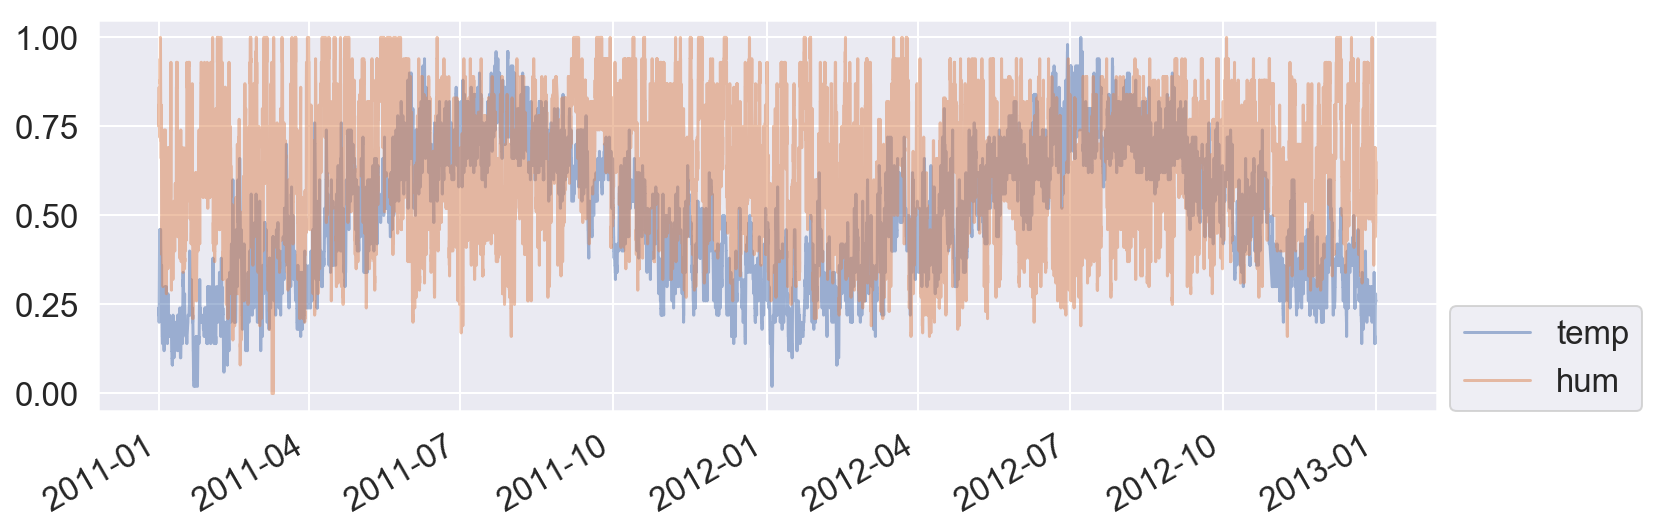

In [15]:
df[['temp', 'hum']].plot(alpha=0.5, figsize=(12, 4))
plt.legend(loc=[1.01, 0])
plt.show()

## Resampling

We can use resampling to aggregate over a specified duration, obtaining for example one aggregated value per day.

In [16]:
temp_rs = df[['temp']].resample('D').mean()
temp_rs.head()

,temp
2011-01-01,0.344167
2011-01-02,0.363478
2011-01-03,0.196364
2011-01-04,0.200000
2011-01-05,0.226957


In [17]:
temp_rs.shape

(731, 1)

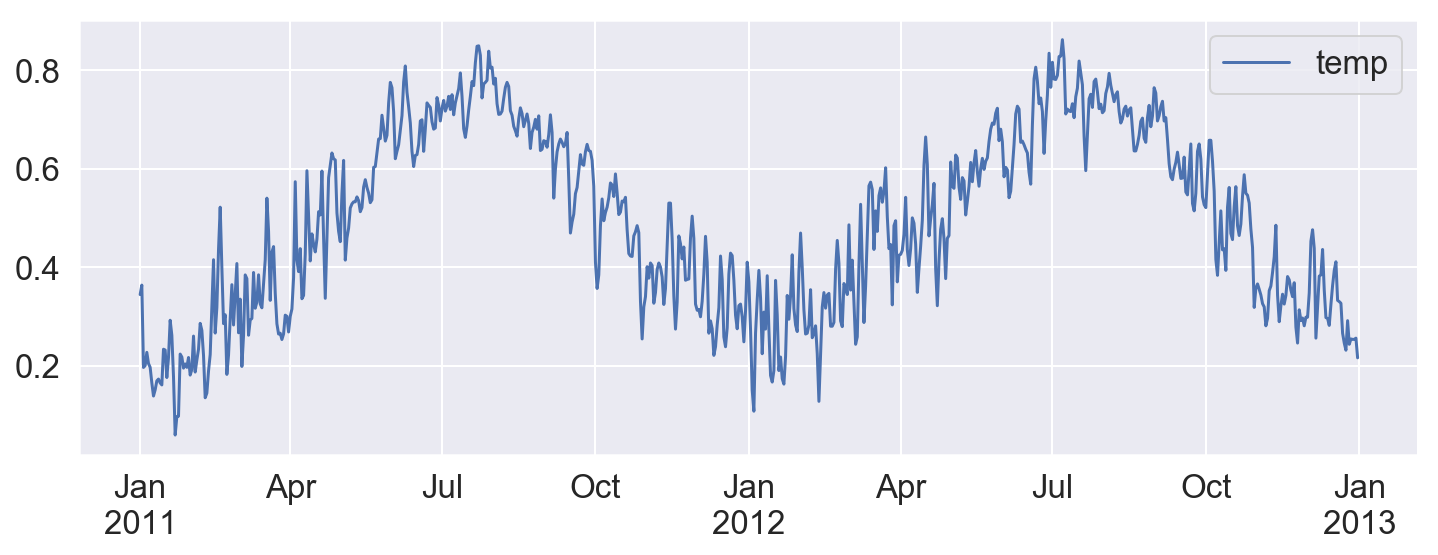

In [18]:
temp_rs.plot(figsize=(12, 4))
plt.show()

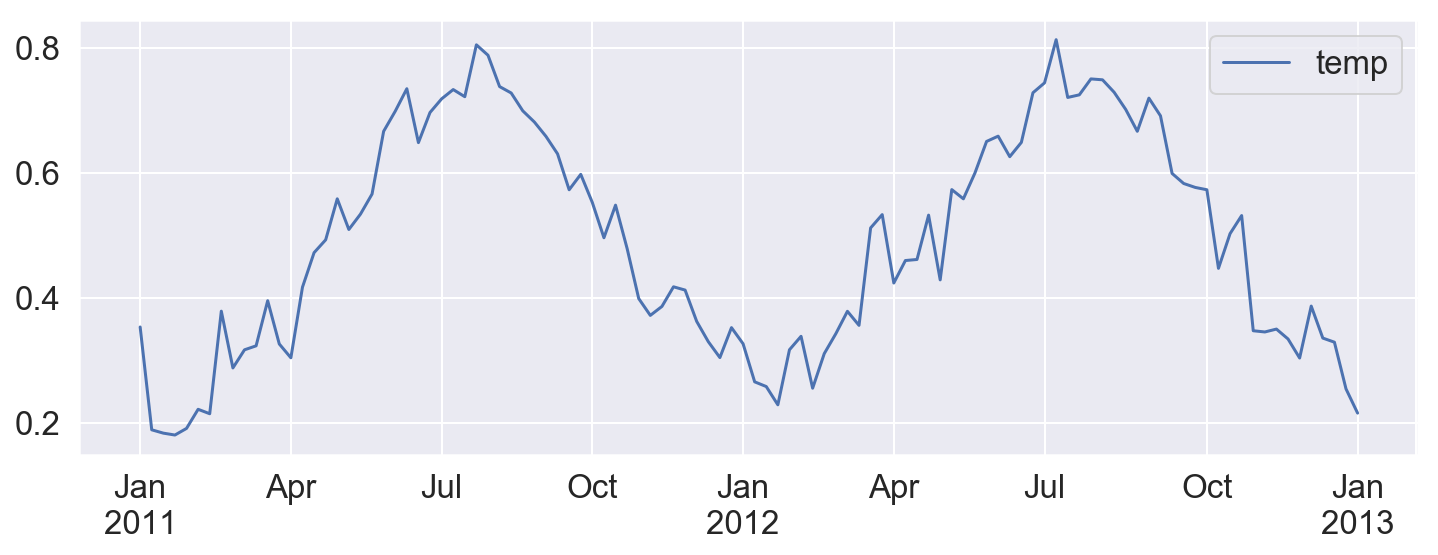

In [19]:
df[['temp']].resample('W').mean().plot(figsize=(12, 4))
plt.show()

## Rolling window aggregates

With the `rolling` function we can also aggregate over a given period, however starting from any given point in the time series, thus creating (nearly) as many entries as in the original time series.

In [20]:
temp_rolling = df[['temp']].rolling(7).mean()
temp_rolling.head(15)

,temp
2011-01-01 00:00:00,NaN
2011-01-01 01:00:00,NaN
2011-01-01 02:00:00,NaN
2011-01-01 03:00:00,NaN
2011-01-01 04:00:00,NaN
2011-01-01 05:00:00,NaN
2011-01-01 06:00:00,0.231429
2011-01-01 07:00:00,0.225714
2011-01-01 08:00:00,0.228571
2011-01-01 09:00:00,0.242857


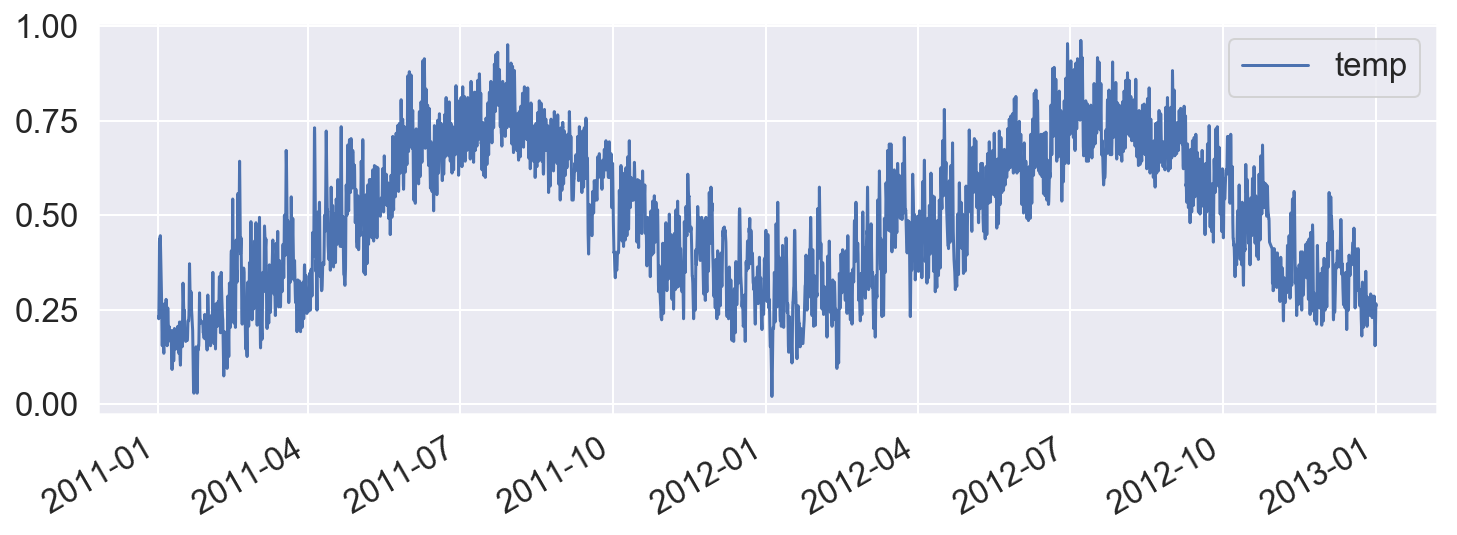

In [21]:
temp_rolling.plot(figsize=(12, 4))
plt.show()

## Differencing 

Often we are not interested in the absolute values of the time series, but rather the changes from one observation to the next, for example the temperature changes from one day to the other.

In [22]:
temp_diff = df.hum.resample('D').mean().diff()
temp_diff.head()

2011-01-01         NaN
2011-01-02   -0.109746
2011-01-03   -0.258814
2011-01-04    0.153162
2011-01-05   -0.153478
Freq: D, Name: hum, dtype: float64

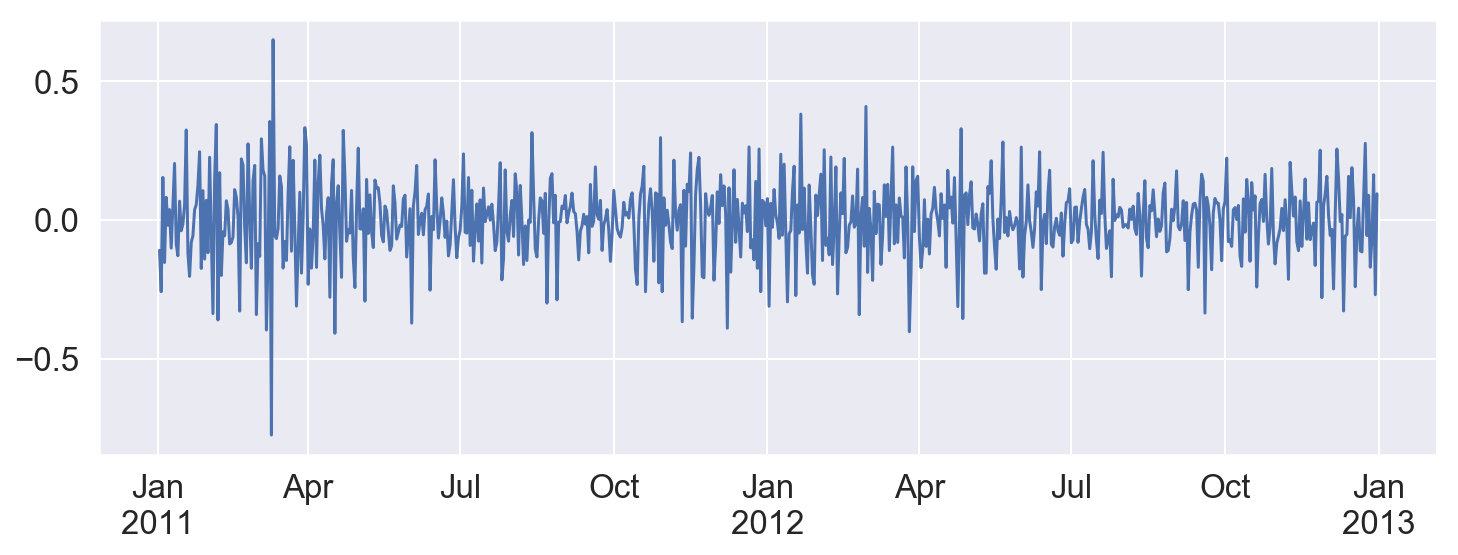

In [23]:
temp_diff.plot(figsize=(12,4))
plt.show()

We can even use more than one differencing step.

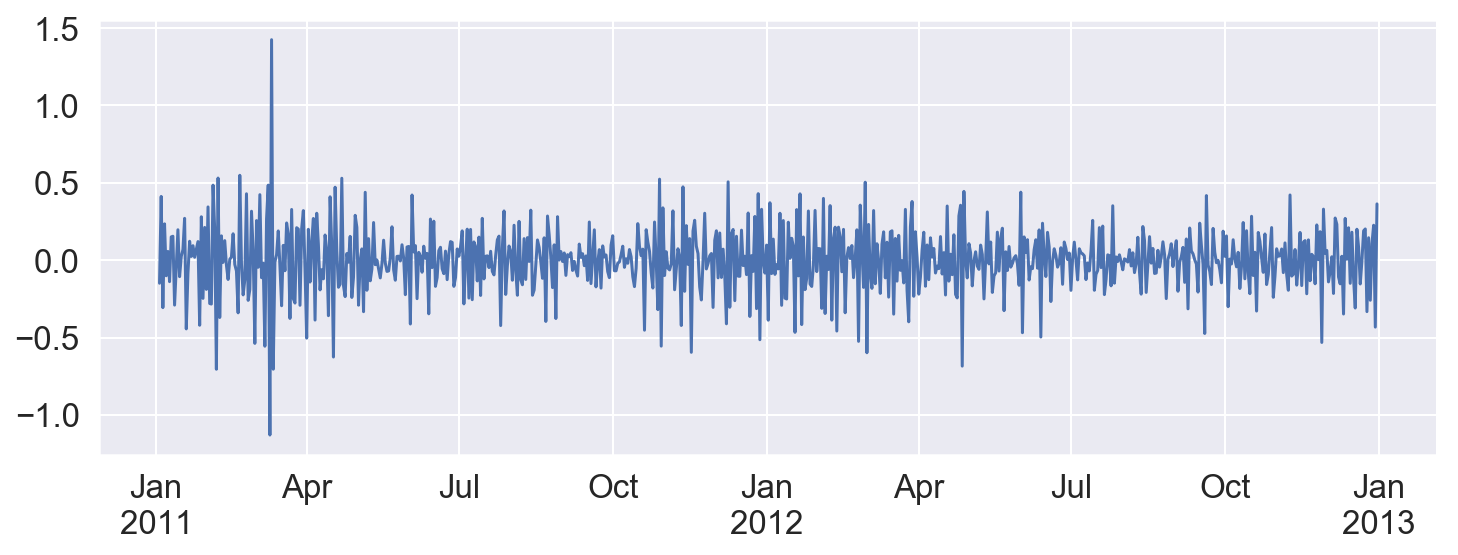

In [24]:
temp_diff.diff().plot(figsize=(12,4))
plt.show()

## Autocorrelations

Statsmodels provides some further methods for displaying information about time series.

In [25]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

Autocorrelations tell us about correlations between observations at a given lag distance.


$$
{\rm acf}({\rm lag_k}) 
= \frac{\sum_{t=k+1}^{n}\left(\;x_t - \bar{x}\;\right)\left(\;x_{t-k} - \bar{x}\;\right)}{\sum_{t=1}^n\left(\;x_t - \bar{x}\;\right)^2}
$$

In [26]:
x = df['temp'].resample('W').mean().dropna()
print('Pandas:')
print([round(x.autocorr(i), 6) for i in range(10)])
print('Statsmodels:')
print(acf(x, nlags=10))

Pandas:
[1.0, 0.941152, 0.902254, 0.867024, 0.822127, 0.753841, 0.679426, 0.603309, 0.491821, 0.379429]
Statsmodels:
[1.         0.92736458 0.86871511 0.81881263 0.76126002 0.68644019
 0.60811068 0.53160746 0.43306228 0.33362736 0.22731075]


In [27]:
def statsmodels_autocorr(y, lag=1):

    if lag == 0:
        return 1.0

    else:
        X = pd.DataFrame({'a': y.values[:-lag], 'b': y.values[lag:]})

        numerator = np.sum((X.loc[:, 'a']-y.mean())*(X.loc[:, 'b']-y.mean()))
        denom = ((y-y.mean())**2).sum()
        autocorr = numerator/denom

        print('Pandas:', X.corr().iloc[0, 1], '\t Statsmodels:', autocorr)
        return autocorr

In [28]:
for i in range(10):
    autocorr = (statsmodels_autocorr(x, lag=i))

Pandas: 0.9411516906835772 	 Statsmodels: 0.9273645759657049
Pandas: 0.902253965310258 	 Statsmodels: 0.8687151145051984
Pandas: 0.8670244885865204 	 Statsmodels: 0.8188126293285541
Pandas: 0.822126648305551 	 Statsmodels: 0.7612600174082019
Pandas: 0.7538410654886081 	 Statsmodels: 0.686440190857464
Pandas: 0.6794257588472152 	 Statsmodels: 0.6081106756704443
Pandas: 0.6033094331796884 	 Statsmodels: 0.5316074584231709
Pandas: 0.491820761725192 	 Statsmodels: 0.4330622765772828
Pandas: 0.379429035673831 	 Statsmodels: 0.3336273599066571


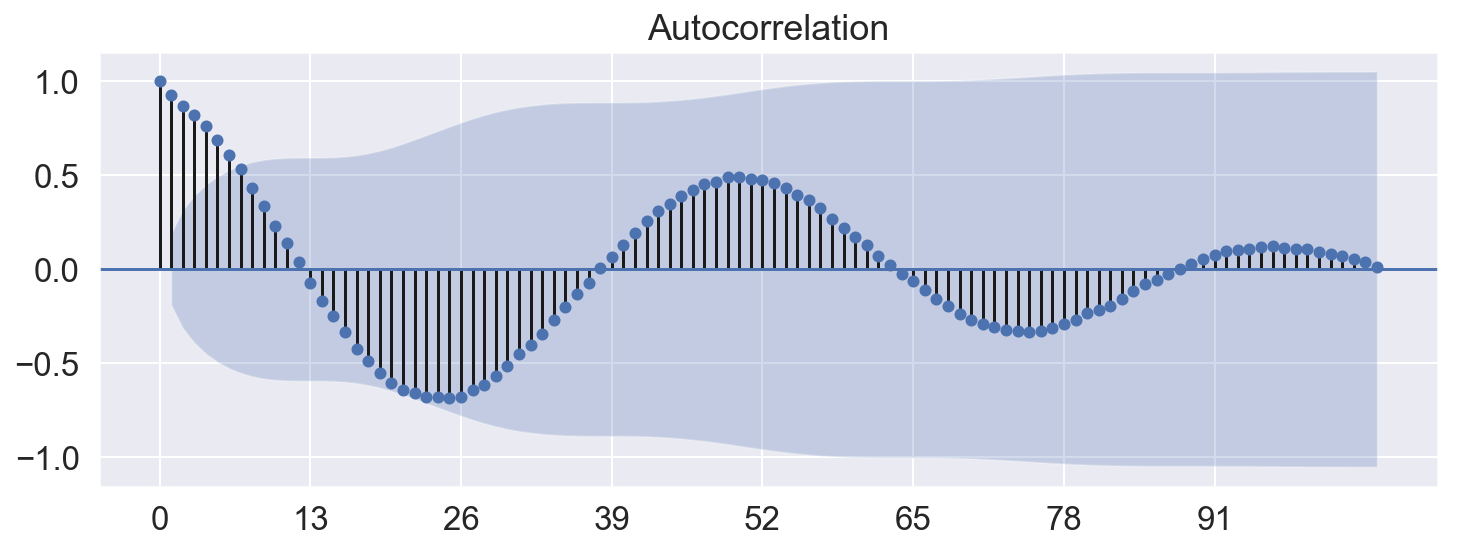

In [29]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(df['temp'].resample('W').mean().dropna(), ax=ax)
ax.set_xticks(range(0, 104, 13))
plt.show()

## Financial data

Pandas datareader provides some interfaces for getting financial data, for example from IEX. Ticker symbols can be found [here](https://iextrading.com/trading/eligible-symbols/).

In [30]:
import pandas_datareader as pdr

In [31]:
import pandas_datareader.data as web

from datetime import datetime

start = datetime(2015, 2, 9)
end = datetime(2017, 5, 24)

In [32]:
df_1 = web.DataReader('DB', 'iex', start, end)
#df_1.to_csv('DB.csv')

In [33]:
df_1.shape

(578, 5)

In [34]:
df_1.index = pd.to_datetime(df_1.index)

In [35]:
df_1.head()

,open,high,low,close,volume
date,,,,,
2015-02-09,28.8124,29.1276,28.7837,29.0321,1129867
2015-02-10,29.0703,29.1372,28.7742,29.0512,1679126
2015-02-11,29.0512,29.0703,28.6691,28.8219,1229098
2015-02-12,29.6913,30.2167,29.6435,30.1785,2276823
2015-02-13,30.5797,30.9810,30.5702,30.8472,2366884


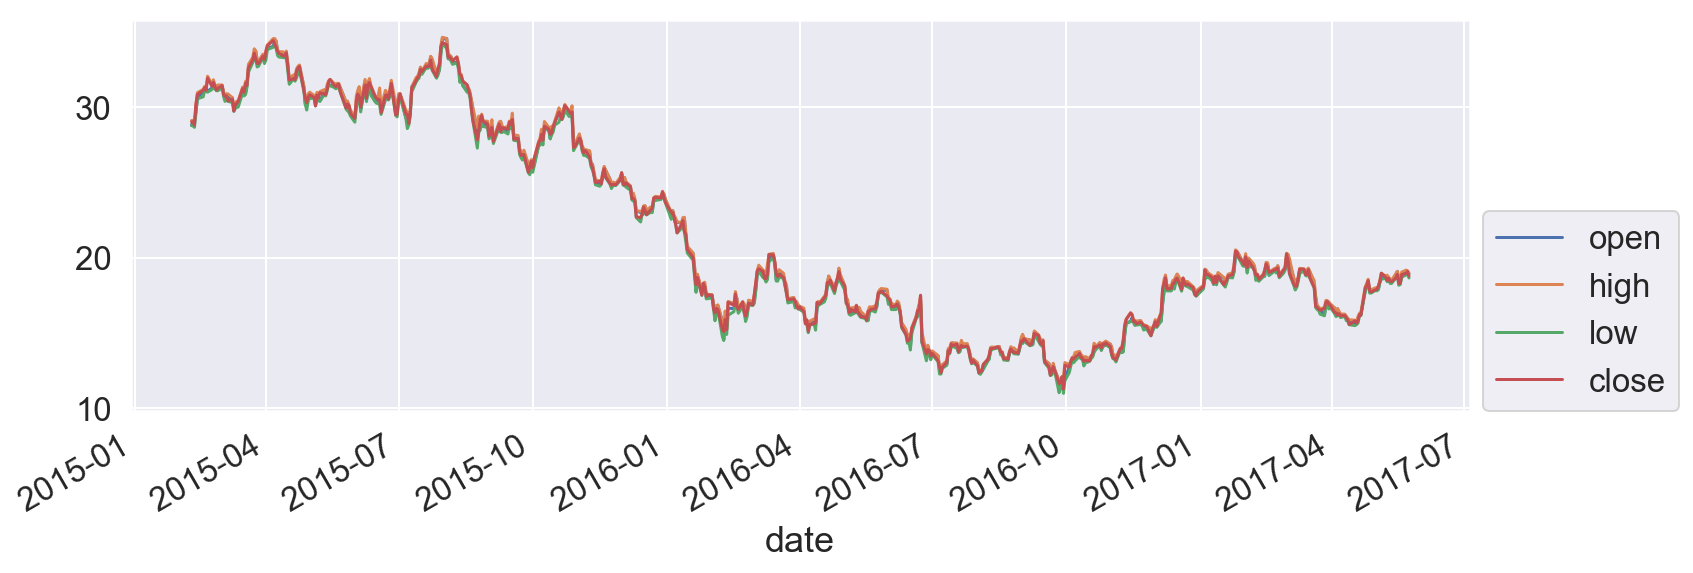

In [36]:
df_1[[col for col in df_1.columns if col != 'volume']].plot(figsize=(12, 4))
plt.legend(loc=[1.01, 0])
plt.show()

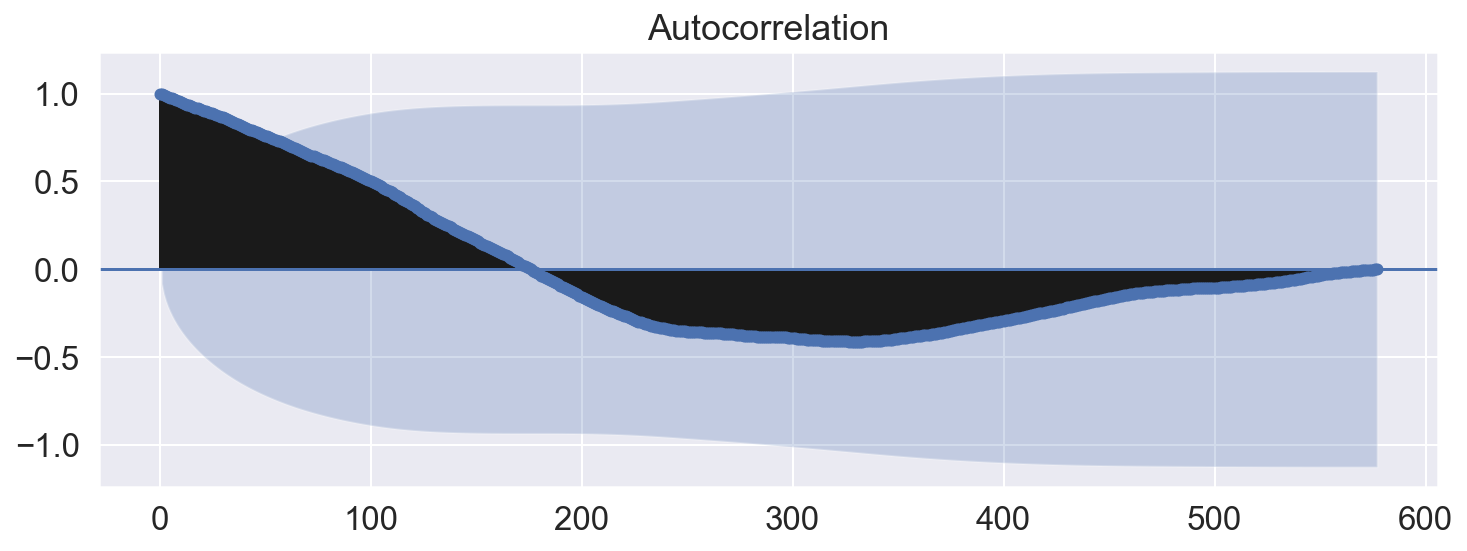

In [37]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(df_1.close, ax=ax)
plt.show()

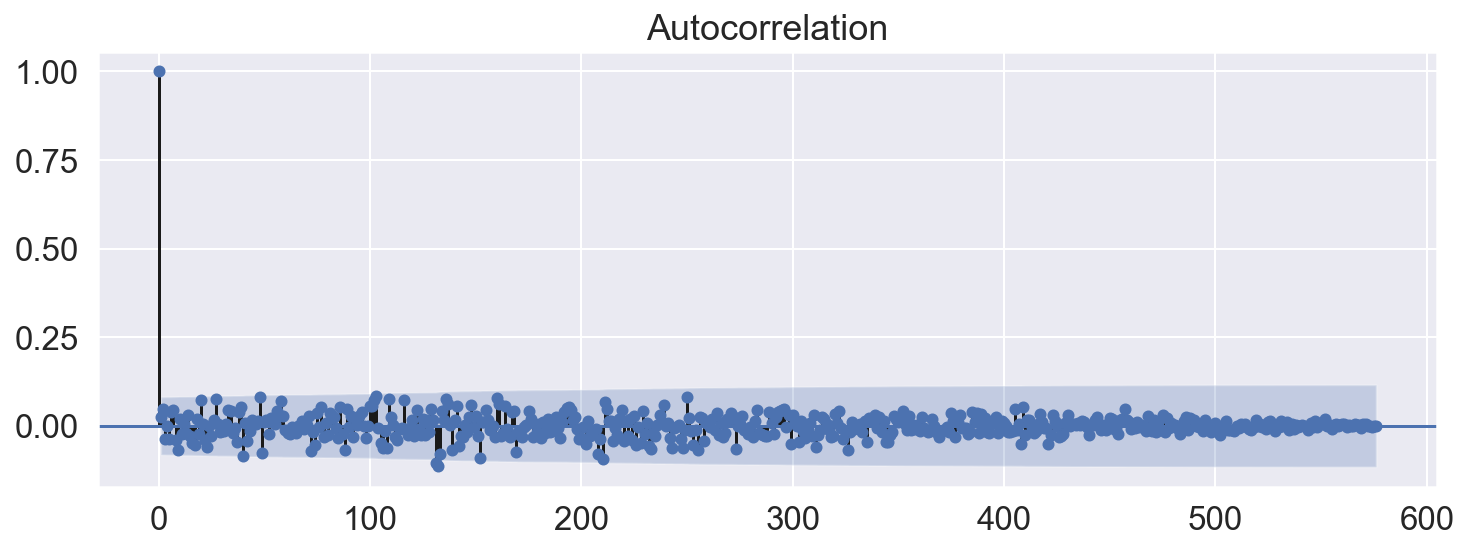

In [38]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(df_1.close.diff()[1:], ax=ax)
plt.show()

## Seasonal decomposition

We can decompose time series into different parts inferring trend and seasonality patterns. Doing so requires identifying a seasonality frequency, for example by looking at the autocorrelations. For how to do the classical decomposition used by statsmodels, see [here](https://otexts.com/fpp2/classical-decomposition.html).

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [40]:
seasonal = seasonal_decompose(
    df['temp'].resample('W').mean().dropna(), freq=12)
#seasonal = seasonal_decompose(df['temp'].rolling(7).mean().dropna(),freq=52);

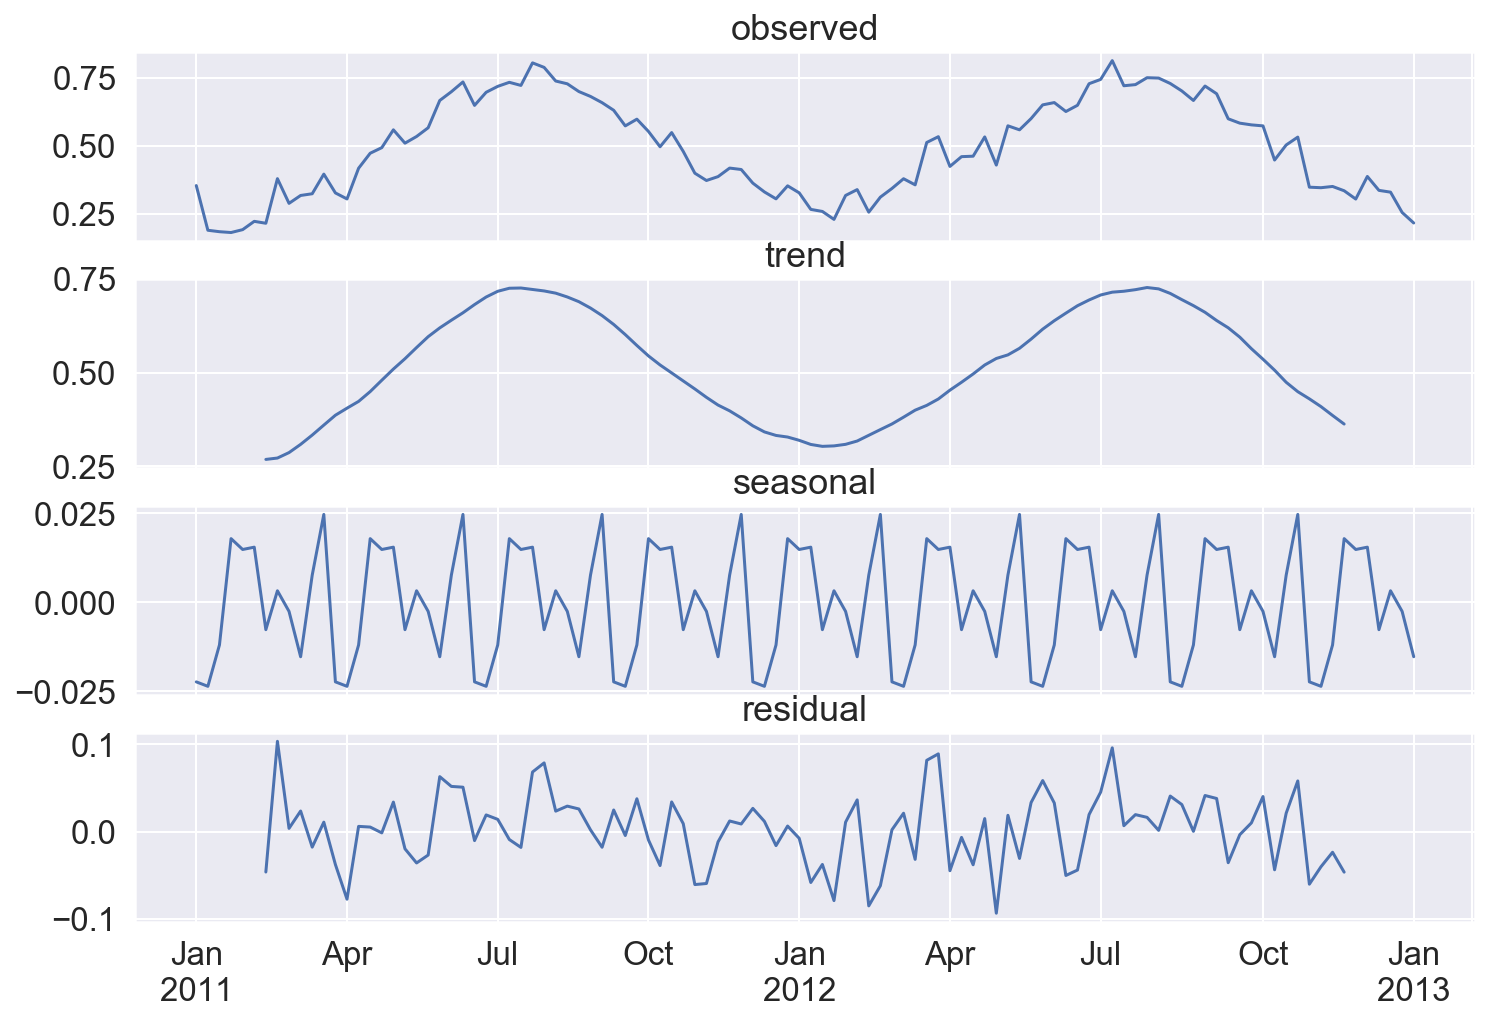

In [41]:
fig, ax = plt.subplots(nrows=4, figsize=(12, 8), sharex=True)
seasonal.observed.plot(ax=ax[0], title='observed')
seasonal.trend.plot(ax=ax[1], title='trend')
seasonal.seasonal.plot(ax=ax[2], title='seasonal')
seasonal.resid.plot(ax=ax[3], title='residual')
plt.show()

## Yearly sunspot counts

A signal with a clear periodicity pattern and long observation history is given by yearly counts of sunspots. The data can be loaded from statsmodels.

- Plot the data
- Look at the autocorrelations. Does differencing change their shape?
- Obtain the seasonal decomposition. Which frequency should you choose?

In [42]:
import statsmodels.api as sm

In [43]:
sunspots = sm.datasets.sunspots.load_pandas()

In [44]:
sunspots.data.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


## R package data with statsmodels

Statsmodels makes it possible to load data from R packages, e.g. `MASS` or `Ecdat`. See [here](http://vincentarelbundock.github.io/Rdatasets/datasets.html) for an index.

In [45]:
data = sm.datasets.get_rdataset('IncomeUK', package='Ecdat')

In [46]:
data.keys()

dict_keys(['data', '__doc__', 'package', 'title', 'from_cache'])

In [47]:
print(data.__doc__)

+----------+-----------------+
| IncomeUK | R Documentation |
+----------+-----------------+

Seasonally Unadjusted Quarterly Data on Disposable Income and Expenditure
-------------------------------------------------------------------------

Description
~~~~~~~~~~~

quarterly observations from 1971–1 to 1985–2

*number of observations* : 58

*observation* : country

*country* : United Kingdown

Usage
~~~~~

::

   data(IncomeUK)

Format
~~~~~~

A time serie containing :

income
   total disposable income (million Pounds, current prices)

consumption
   consumer expenditure (million Pounds, current prices)

References
~~~~~~~~~~

Verbeek, Marno (2004) *A Guide to Modern Econometrics*, John Wiley and
Sons, chapters 8 and 9.

See Also
~~~~~~~~

``Index.Source``, ``Index.Economics``, ``Index.Econometrics``,
``Index.Observations``,

``Index.Time.Series``



In [48]:
data.data.head()

,income,consumption
0,9014,8016
1,9659,8798
2,9848,9184
3,10316,9755
4,10254,9113


In [49]:
date_index = pd.period_range(start='1971-01-01', freq='Q', periods=58)
data.data.set_index(date_index, inplace=True)
data.data.head()

,income,consumption
1971Q1,9014,8016
1971Q2,9659,8798
1971Q3,9848,9184
1971Q4,10316,9755
1972Q1,10254,9113


- Plot the data
- Look at the autocorrelations. Does differencing change their shape?
- Obtain the seasonal decomposition. Which frequency should you choose?

## Investigate more data with pandas datareader

- Plot the data
- Look at the autocorrelations. Does differencing change their shape?
- Obtain the seasonal decomposition. Which frequency should you choose?